# Training of a super simple model for celltype classification and explanation of its predictions

# Part I - Training

In [1]:
import datetime
import os

import ipywidgets as widgets
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from ipywidgets import interact, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

!which python
!python --version
print(tf.VERSION)
print(tf.keras.__version__)
!pwd #  start jupyter under notebooks/ for correct relative paths


/home/phineas/anaconda3/envs/depiction-env/bin/python
Python 3.6.5 :: Anaconda, Inc.
1.14.0
2.2.4-tf
/home/phineas/Documents/repos/dl-interpretability-compbio/notebooks


## a look at the data
labels are categories 1-20, here's the associated celltype:

In [2]:
meta_series = pd.read_csv('../data/single-cell/metadata.csv', index_col=0, dtype=str).rename_axis(None)
meta_series

,cell type name
1,CD11b- Monocyte
2,CD11bhi Monocyte
3,CD11bmid Monocyte
4,Erythroblast
5,HSC
6,Immature B
7,Mature CD38lo B
8,Mature CD38mid B
9,Mature CD4+ T
10,Mature CD8+ T


There are 13 unbalanced classes, and over 80k samples

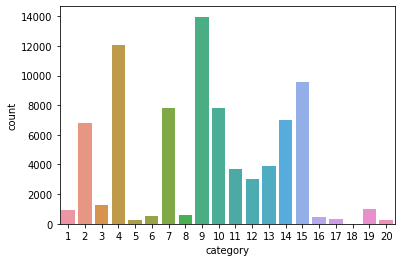

In [3]:
data_df = pd.read_csv('../data/single-cell/data.csv')
sns.countplot(data_df.category)

In [4]:
data_df.sample(n=10)


,CD45,CD45RA,CD19,CD11b,CD4,CD8,CD34,CD20,CD33,CD123,CD38,CD90,CD3,category
16758,-0.029914,0.312800,1.182900,1.99460,-0.138570,0.889660,1.719600,-0.006738,-0.555440,-0.106600,2.3930,1.27540,3.28430,4
64552,4.352000,3.413900,-0.067296,0.59838,4.276000,1.139600,-0.127310,0.062857,-0.425700,-0.165250,3.5315,-0.01568,4.97050,14
30903,4.634700,1.042700,-0.258190,0.83227,3.838300,-0.164320,0.385920,0.886000,-0.016354,0.946350,1.0939,1.28870,2.77450,9
43377,4.851300,1.134600,-0.376050,-0.18539,4.299700,0.862390,-0.122620,-0.072810,2.524000,-0.006666,2.4029,0.30999,5.46580,9
5822,4.410600,0.465930,0.983270,2.75850,2.270700,0.552910,-0.107310,-0.138900,5.073700,1.992700,4.0985,1.01490,-0.15039,2
12697,-0.032976,-0.712890,-0.005581,0.45489,1.299500,-0.023637,-0.063125,-0.018057,0.044404,-0.046674,1.9319,1.20520,1.42790,4
4817,4.008500,-0.219170,-0.004018,3.33970,0.239660,-0.089035,0.267410,-0.051956,4.601500,1.967100,3.0798,1.47000,1.41000,2
56269,1.792400,0.644490,-0.125710,-0.33546,2.519900,-0.094398,-0.058901,-0.017540,1.769000,-0.341280,2.8757,0.53181,-0.46422,12
19532,-0.287960,-0.026452,-0.074754,1.20000,-0.004963,-0.001120,-0.109780,-0.125190,0.550260,0.622520,2.6595,0.51005,2.05030,4
35107,4.879400,0.724190,1.010000,0.26920,4.778700,2.262500,0.507120,-0.112840,0.742910,0.295800,2.3651,0.81108,4.96440,9


In [5]:
# class wise probabilities
def one_hot_encoding(classes):
    return to_categorical(classes)[:, 1:]  # remove category 0

def one_hot_decoding(labels):
    return labels.argmax(axis=1) + 1

In [6]:
classes = data_df['category'].values
labels = one_hot_encoding(classes)

In [7]:
one_hot_decoding(labels)

array([ 1,  1,  1, ..., 20, 20, 20])

In [8]:
labels # model output (softmax) for classification shows probabilities per class

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
#scale the data from 0 to 1
min_max_scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
data = min_max_scaler.fit_transform(data_df.drop('category', axis=1).values)
data.shape

(81075, 13)

In [10]:
data_train, data_test, labels_train, labels_test = train_test_split(
    data, labels,
    # TODO make choices on keyword arguments
)

In [11]:
batchsize = 32

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((data_train, labels_train))
dataset = dataset.shuffle(2 * batchsize).batch(batchsize)
dataset = dataset.repeat()

testset = tf.data.Dataset.from_tensor_slices((data_test, labels_test))
testset = testset.batch(batchsize)

## Implement a simple model
start with a dense/linear layer, train a few epochs and grow/adapt your network architecture as you like
for classification end with a softmax for output probability per celltype.

In [13]:
model = tf.keras.Sequential()

model.add(
    # TODO provide layers
)

TypeError: add() missing 1 required positional argument: 'layer'

In [14]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.categorical_accuracy])

In [ ]:
# evaluation on testset on every epoch
# log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(
    dataset,
    epochs=20, steps_per_epoch=np.ceil(data_train.shape[0]/batchsize),
    validation_data=testset, #  callbacks=[tensorboard_callback]
)

## Now what did the model learn?
Let's save to model to use an explainer from `depiction` to investigate

In [ ]:
!pwd
!ls

In [ ]:
# Save entire model to a HDF5 file
model.save('./celltype_model.h5')

In [ ]:
# tensorboard --logdir logs/fit

In [ ]:
# To recreate the exact same model, including weights and optimizer.
# model = tf.keras.models.load_model('./celltype_model')

# Part II - Explaining

### Here we are going to apply _lime_ and _anchor_ to the model to explain the prediction for given samples
keep in mind those methods are trained on data themselves

In [ ]:
# Use DataFrame to track feature names and choose samples of given class
test_df = pd.DataFrame(
    np.append(data_test, one_hot_decoding(labels_test)[:, None], axis=1), columns=data_df.columns
)
# valid_df, test_df = train_test_split(test_df, test_size=0.67, stratify=test_df.category)
data_valid, data_test, labels_valid, labels_test = train_test_split(
    data_test, labels_test, test_size=0.67, stratify=test_df.category
)

# train_df.head()

In [ ]:
pd.Series()

## Using the pretrained model  with `depiction`
by implementing a class inheriting from `depiction.models.Model`  


In [15]:
# lets find the saved model
!pwd
!ls
!ls ~/.keras/models

/home/phineas/Documents/repos/dl-interpretability-compbio/notebooks
celltype_exercise.ipynb		 deepbind.ipynb   single-cell.py
celltype_interpretability.ipynb  model-zoo.ipynb  test.ipynb
celltype_model.h5		 paccmann.ipynb
celltype_training.ipynb		 README.md
celltype_model.h5


In [16]:
import depiction

In [17]:
from tensorflow import keras
from depiction.models.base.base_model import BaseModel
from depiction.core import Task, DataType

class CellTyper(BaseModel):
    """Classifier of single cells to be explained."""

    def __init__(self, filename, directory): 
        """Initalize the Model."""
        super(CellTyper, self).__init__(Task.CLASSIFICATION, DataType.TABULAR)
        self.model_path = os.path.join(os.path.expanduser(directory), filename)
        self.model = None # TODO load your model from disk

    def predict(self, sample, **kwargs):
        """
        Run the model for inference on a given sample and with the provided
        parameters.

        Arguments:
            sample (object): an input sample for the model.
            kwargs (dict): list of key-value arguments.

        Returns:
            a prediction for the model on the given sample.
        """
        return self.model.predict(
            sample) # TODO return prediction of sample

### We actually just need the results from prediction, not access to the full model.

In [18]:
# Import trained classifier, or use a pretrained one with directory '~/.keras/models'
classifier = CellTyper(filename='celltype_model.h5', directory='.')

In [19]:
classifier.model.summary()

AttributeError: 'NoneType' object has no attribute 'summary'

## Layer weights
are only somewhat interpretable if the model has a single layer

In [ ]:
meta_series.values

In [ ]:
single_layer_model = tf.keras.models.load_model(os.path.expanduser('~/.keras/models/celltype_model.h5'))
weights = None  # TODO access weights from single_layer_model
sns.heatmap(pd.DataFrame(
    weights,
    index=data_df.columns[:-1],
    columns=meta_series.values
).T)

## Interpretability methods
helper functions and a widget to sample from a class

In [23]:
from depiction.interpreters.u_wash.u_washer import UWasher
from depiction.core import DataType

In [24]:
class_names = meta_series.to_dict()['cell type name']

In [25]:
explanation_configs = {
        'top_labels': 1
    }
interpreter_params = {
        # TODO provide interpreter params
}

explainer = UWasher("lime", classifier, **interpreter_params)

id_sample_to_explain = 0
# explain the chosen instance wrt the chosen labels
explainer.interpret(test_df.values[id_sample_to_explain, :-1], explanation_configs=explanation_configs)

TypeError: __init__() missing 1 required positional argument: 'training_data'

## Widgets to look at random sample from class

In [29]:
def random_from_class(label):
    id_sample_to_explain = test_df.reset_index().query('category==@label').sample(n=1).index[0]
    print('Interpreting sample with index {} in test_df'.format(id_sample_to_explain))
    return id_sample_to_explain


def interpret_with_lime(id_sample_to_explain):
# Create a LIME tabular interpreter
    explanation_configs = {
        'top_labels': 1
    }
    interpreter_params = {
        # TODO provide interpreter params
    }

    explainer = UWasher("lime", classifier, **interpreter_params)

    # explain the chosen instance wrt the chosen labels
    explainer.interpret(test_df.values[id_sample_to_explain, :-1], explanation_configs=explanation_configs)


def interpret_with_anchor(id_sample_to_explain):
    explanation_configs = {}
    interpreter_params = {
        'feature_names': data_df.columns[:-1],
        'class_names': class_names.values(),
        'categorical_names': {}
    }

    explainer = UWasher('anchors', classifier, **interpreter_params)  
    
    explainer.explainer.fit(
        data_train, labels_train, data_valid, labels_valid #.astype(np.int)
    )


    # explain the chosen instance wrt the chosen labels
    def new_predict(sample, **kwargs):
        return np.argmax(classifier.predict(sample,**kwargs), axis=1)
    explainer.interpret(test_df.values[id_sample_to_explain, :-1], explanation_configs=explanation_configs,callback=new_predict)

    
def interpret_random_from_class(label, interpreter):
    id_sample_to_explain = random_from_class(label)
    if interpreter == 'lime':
        interpret_with_lime(id_sample_to_explain)
    elif interpreter == 'anchor':
        interpret_with_anchor(id_sample_to_explain)

In [27]:
interact_manual(interpret_random_from_class, label=[(v, k) for k, v in class_names.items()],
         interpreter=['lime', 'anchor']
);

interactive(children=(Dropdown(description='label', options=(('CD11b- Monocyte', 1), ('CD11bhi Monocyte', 2), …

In [30]:
interpret_with_anchor(8373)

NameError: name 'data_valid' is not defined

Compare qualitatively to __B__ and **C** (thought the image is not depicting this exact dataset)
![manual_gated](https://science.sciencemag.org/content/sci/332/6030/687/F2.large.jpg?width=800&height=600&carousel=1)
from https://science.sciencemag.org/content/332/6030/687/tab-figures-data